# Recognition of American Sign Language via a Leap Motion

*by Matt Hehn, Ben Campbell, & Chris Cochran, December, 2017*

## Introduction

In October 2017, we participated in Colorado State University's Virtual Reality Hackathon. During the 48-hour hackathon, our 4-person team developed a prototype Virtual Reality (VR) experience meant to allow people to learn or practice American Sign Language. Traditionally, learning ASL requires someone already skilled to act as a teacher/tutor to the new learner, which limits the ability of many to learn the language. Additionally, children having to learn ASL as their first language have yet greater difficulties learning the language without another way to convey meaning.

Our project in the hackathon was designed to interpret sign language using a Leap Motion sensor mounted on the front of a VR headset, and provide active feedback to the user as to whether they had accurately mimicked a sign (and what it was, if they succeeed. A visual reference was shown in the VR environment). To aid in first-language learning, the system was designed to be able to enter a 'quiz' demo mode, which would ask the user to sign out a full word, at which point the simulation would spawn in a 3D model of the object the word refers to. We ultimately [won the hackathon](https://source.colostate.edu/sign-language-project-wins-second-annual-ram-hackathon/).

The key limitation of this demo was its accuracy. In the original Unity project, the C# code used to take data from the sensor was making a very naive comparison with a threshhold of allowed difference between a single "good" reference for a sign and the current position of the hand and fingers. Using this method, we were only able to get the prototype to accurately and regularly recognize roughly six letters. 

It was our aim in this project (and even during the hackathon, though time limitations made it impossible) to train a neural network to more accurately recognize and categorize correct signs to then be re-incorporated back into the VR project at some later date.

## Prerequisites/Materials

### Notebook

- Python 3.x
- Numpy
- Pandas
- MatplotLib
- Chuck Anderson's Neural Net package

### Full Project

- Python 3.x 64-bit
    - Must be 64-bit, as the Python LeapMotion API had to be recompiled for use in Python 3 and was recompiled for 64-bit
- Numpy
- Pandas
- Matplotlib
- Chuck Anderson's Neural Net Package
- [Leap Motion Orion 3.2.1 SDK](https://developer.leapmotion.com/releases), Windows version used.
- Leap Motion USB Sensor

## Methods

In order to even begin with structuring and formatting data for implementation with the Neural Network, our work to pull hand data from the sensor had to be ported to the Python version of the sensor SDK's API. Once this was completed, we needed to implement methods to generate and then store data pertaining to hands to a CSV file, with the correct letter/translation of the sign in a row. 

We ultimately stored a unit vector for each bone in the hand that is tracked by the Leap Motion sensor. By default, the vectors are defined in world coordinates for the sensor rather than relative units. To combat this, we re-defined the hand bones in reference to the palm's vector (so that relative hand position in the sensor's FOV would not confound the bone vectors).

At this point, since no dataset we could find online appeared to be in a state we would be able to accurately compare against, we began attempts to generate our own dataset using the script contained in ```HandData.py```. Our team generated much of the data in our dataset personally or with friends/family. 

To generate data, the Leap Motion sensor was plugged into a Windows computer via a short usb cable. Due to relative unfamiliarity of some of the participants with the signs, an image was pulled up on the computer (Sourced from [Lifeprint](http://lifeprint.com/asl101/fingerspelling/images/abc1280x960.png) under their terms for image use) and used as a reference to aid in accurate signing. Participants in data collection were instructed to sign with their hands slightly behind the sensor on the table, to increase the number of signs where the sensor would be able to at least view fingers unobscured by the hand itself.

The number of samples for each letter of the alphabet in the data1Normed.csv dataset is listed below.

In [1]:
%run "HandNNetSamples.py"

206 samples in class: 0, sign: a 
228 samples in class: 1, sign: b 
158 samples in class: 2, sign: c 
178 samples in class: 3, sign: d 
155 samples in class: 4, sign: e 
190 samples in class: 5, sign: f 
175 samples in class: 6, sign: g 
181 samples in class: 7, sign: h 
199 samples in class: 8, sign: i 
227 samples in class: 9, sign: j 
166 samples in class: 10, sign: k 
219 samples in class: 11, sign: l 
146 samples in class: 12, sign: m 
197 samples in class: 13, sign: n 
222 samples in class: 14, sign: o 
189 samples in class: 15, sign: p 
218 samples in class: 16, sign: q 
209 samples in class: 17, sign: r 
170 samples in class: 18, sign: s 
186 samples in class: 19, sign: t 
175 samples in class: 20, sign: u 
190 samples in class: 21, sign: v 
173 samples in class: 22, sign: w 
210 samples in class: 23, sign: x 
273 samples in class: 24, sign: y 
231 samples in class: 25, sign: z 


Once we had enough data to begin working with, we set up some methods which would leverage Chuck's Neural Net package and utilities in addition to some of Matt's code from CS440 Assignment 6, which analyzed neural networks given a CSV dataset for use in developing a categorization neural net. This code can be found in ```HandNNet.py``` and the ```Test NNet.ipynb```

The graph from the trained network of structure [252] can be seen below (80/20 split).

In [5]:
%run "HandNNetGraph.py"

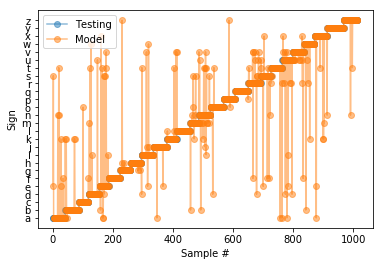

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(Ttest, 'o-', alpha=0.5)
plt.plot(result, "o-", alpha=0.5)

labels = np.unique(data[:, 63])
plt.xlabel("Sample #")
plt.ylabel("Sign")

plt.yticks(np.unique(Ttest).tolist(), np.unique(labels).tolist())

plt.legend(('Testing','Model'), loc='upper left')

Final error is 0.0003592975076544833 (in previous run)

### Team Work split:

- Ben Campbell
    - Data Generation
    - Partial report writeup
    - Neural Network configuration testing
- Chris Cochran
    - LOT of Data Generation (my hand hurts)
    - Neural Network configuration testing
    - Partial report writeup
- Matt Hehn
    - Built the Python 3 wrapper for Leap Motion SDK API
    - Ported the handling of the sensor controller
    - Ported and modified hand data normalization and formatting
    - Set up the data-to-csv function
    - Set up the Neural Network interface and training functions 
    - Set up testing python notebook for training and comparing networks
    - A little bit of data generation
    - Part of report writeup

## Results

As can be seen in the plot in the methods section, despite using a network that is basically just linear regression, we managed to end with a final error of about three thousandths. After trying multiple network models that were far more complex, it turns out that the simplicity of this network works well with our data set, and provides the best results. Error does not significantly drop after training for 200 iterations, and exhibits overtraining on the data rather quickly (by 220 iterations or so).


### Limitations

While the model built by the network does not seem to have error centralized significantly on any particular predicted classes, and it seems plausible to us that this remaining error may be most significantly attributed to the highly limited scale of our dataset as it is currently used.

Additionally, the error could in part be attributed to the variances of the Leap Motion sensor itself, given its relatively poor accuracy versus other (but far more expensive) sensor arrays or methodologies. The Leap being a single, table-mounted infrared paralax camera sensor definitely limits its accuracy in tracking individual fingers, and exhibits a great deal of trouble with tracking when fingers are too close to one another, or a hand is closed. Regardless, the model and our efforts to manage our data seem to have gotten us fairly acceptable accuracy anyway.

Finally, the number of participants we used to generate data was *very* limited and could be skewing our data somewhat. While some of the participants were more familiar with American Sign Language than others, we think none could truly be classified as 'experts' in the way someone truly fluent in ASL would be. Also, this project only has trained for individual letters, not numbers or signs that represent whole words or ideas in and of themselves. Part of this restriction is practical, simply to limit the scope of the project. The other is that some signs require more full bodied movements and interactions, which the Leap Motion sensor simply is not capable of tracking due to its limited field of view and capabilities for tracking. 
    
And of course, even though this is American Sign Language, switching to other versions would be fairly simple, but time consuming as it requires a new data set. It also requires retraining of the neural network and potential tweaks to the structure, but that is to be expected.


## Conclusions

Compared to what we had at the end of the Hackathon, this system is *Leaps* and bounds above. While it is not perfect, we believe it to be a solid demonstration of a neural network decifering American Sign Language hand signs. Given more time, better sensors, and a whole lot more data, we believe we could improve this model even more. 

Despite other sensors being more accurate, we believe that the Leap Motion allows our work on this project to be more accessible. The cost of the Leap Motion results in a much lower barrier to entry if anyone wanted to implement our network when creating a translator, teaching tool, or any other project they wanted to create.

Unfortunately, the way the Leap Motion operates, we couldn't find a way to track motions and all of our hand signs are based off of single frames that we captured. This means that our project cannot be implemented accross an entire dictionary of words but it works really well for letters. We knew this was a limitation going in though, which is why we focused on just getting letters to work well. 

In summary, this project has been a fantastic extension of the ideas and project we started at the 2017 RAMHACK and exhibits some of the potential of neural networks as a technique for real world problems. It has improved the accuracy of our project significantly, yet was not overly complex to develop.

### References

* [Chuck Anderson's CS440 course notes and resources](http://www.cs.colostate.edu/~anderson/cs440/doku.php)
* [Leap SDK doc](https://developer.leapmotion.com/documentation/python/api/)
* [Lifeprint](http://lifeprint.com/asl101/)